# Starting a business in the Province of Rome - Italy. Where and what?
## Our method can be summarized as:
1. Get the geospatial co-ordinates for all the towns in the province of Rome(excluding the city itself)
2. Get the population of each town
3. Use k-means clustering to find the most populated areas.
4. Show this on a map of the area
5. Use Foursquare to get the types of business in those areas
6. Select the least used business 

In [464]:
import pandas as pd
import numpy as np
import bs4 as bs
import urllib.request

### 1. Get the geospatial coordinates for all the towns in the province of Rome, Italy

In [527]:
source = urllib.request.urlopen('http://www.dossier.net/utilities/coordinate-geografiche/provincia-roma.htm').read()

In [528]:
soup = bs.BeautifulSoup(source,'html')

In [529]:
table = soup.find('table', { 'class' : 'tabella' })

In [530]:
def tableDataText(table):    
    """Parses a html segment started with tag <table> followed 
    by multiple <tr> (table rows) and inner <td> (table data) tags. 
    It returns a list of rows with inner columns. 
    Accepts only one <th> (table header/data) in the first row.
    """
    def rowgetDataText(tr, coltag='td'): # td (data) or th (header)       
        return [td.get_text(strip=True) for td in tr.find_all(coltag)]  
    rows = []
    trs = table.find_all('tr') #how trs = # of rows
    headerrow = rowgetDataText(trs[0], 'th')
    if headerrow: # if there is a header row include first
        rows.append(headerrow)
        trs = trs[1:]
    for tr in trs: # for every table row
        rows.append(rowgetDataText(tr, 'td') ) # data row       
    return rows

In [531]:
list_table = tableDataText(table)
 

In [532]:
dfll = pd.DataFrame(list_table,columns =['Denominazione','Lat','Long'])
 

In [533]:
dfll_1 = dfll.drop([0])

In [534]:
dfll_1

,Denominazione,Lat,Long
1,Affile,41.8851242,13.0976659
2,Agosta,41.9825698,13.0337991
3,Albano Laziale,41.7284842,12.6608404
4,Allumiere,42.1573703,11.9050185
5,Anguillara Sabazia,42.0926441,12.2698934
6,Anticoli Corrado,42.0097110,12.9890073
7,Anzio,41.4479468,12.6290520
8,Arcinazzo Romano,41.8807962,13.1153148
9,Ardea,41.6118040,12.5154620
10,Ariccia,41.7217010,12.6740631


In [535]:
dfll_1.loc[dfll_1['Denominazione'] == 'Roma']

,Denominazione,Lat,Long
97,Roma,41.8954656,12.4823243


In [536]:
dfll_1.shape

(121, 3)

### 2. Get  the population data for the province of Rome per town.  

In [537]:
source = urllib.request.urlopen('https://www.tuttitalia.it/lazio/provincia-di-roma/36-comuni/popolazione/').read()
soup = bs.BeautifulSoup(source,'html')
table = soup.find('table', { 'class' : 'ut' })


In [538]:
list_table = tableDataText(table)
list_table[:20]

[['',
  'Comune',
  'Popolazioneresidenti',
  'Superficiekm²',
  'Densitàabitanti/km²',
  'Altitudinem s.l.m.'],
 ['1.', 'ROMA', '2.856.133', '1.287,36', '2.219', '20'],
 ['2.', 'Guidonia Montecelio', '89.671', '79,47', '1.128', '105'],
 ['3.', 'Fiumicino', '80.470', '213,89', '376', '1'],
 ['4.', 'Pomezia', '63.792', '86,57', '737', '108'],
 ['5.', 'Tivoli', '56.472', '68,65', '823', '235'],
 ['6.', 'Anzio', '55.101', '43,65', '1.262', '3'],
 ['7.', 'Velletri', '53.250', '118,23', '450', '372'],
 ['8.', 'Civitavecchia', '52.716', '73,74', '715', '10'],
 ['9.', 'Nettuno', '49.995', '71,64', '698', '11'],
 ['10.', 'Ardea', '49.750', '72,09', '690', '37'],
 ['11.', 'Marino', '44.981', '24,19', '1.859', '360'],
 ['12.', 'Ladispoli', '41.584', '25,95', '1.602', '2'],
 ['13.', 'Monterotondo', '41.287', '40,94', '1.009', '165'],
 ['14.', 'Albano Laziale', '40.980', '23,80', '1.722', '400'],
 ['15.', 'Ciampino', '38.963', '13,00', '2.998', '124'],
 ['16.', 'Cerveteri', '38.083', '134,32', '28

In [539]:
dfroma = pd.DataFrame(list_table,columns =['Nr','Comune','Pop','Area','Densitykm2','Alt'])


In [478]:
dfroma.shape

(122, 6)

In [479]:
dfroma = dfroma.drop([0])

In [480]:
dfroma = dfroma.drop(['Nr'],axis=1)

In [481]:
dfroma.dtypes

Comune        object
Pop           object
Area          object
Densitykm2    object
Alt           object
dtype: object

In [482]:
dfroma['Pop'] = dfroma['Pop'].astype('str')
dfroma['Pop'] = dfroma['Pop'].str.replace('.', '')
dfroma['Pop'] = pd.to_numeric(dfroma['Pop'], errors='coerce')

In [483]:
dfroma.loc['Total'] = pd.Series(dfroma['Pop'].sum(), index = ['Pop'])
dfroma

,Comune,Pop,Area,Densitykm2,Alt
1,ROMA,2856133.0,"1.287,36",2.219,20
2,Guidonia Montecelio,89671.0,"79,47",1.128,105
3,Fiumicino,80470.0,"213,89",376,1
4,Pomezia,63792.0,"86,57",737,108
5,Tivoli,56472.0,"68,65",823,235
6,Anzio,55101.0,"43,65",1.262,3
7,Velletri,53250.0,"118,23",450,372
8,Civitavecchia,52716.0,"73,74",715,10
9,Nettuno,49995.0,"71,64",698,11
10,Ardea,49750.0,"72,09",690,37


In [540]:
dfroma.shape

(122, 6)

### Combine the geospatial and demographical data

In [551]:
df_merged = pd.merge(dfroma,dfll_1,left_on='Comune',right_on='Denominazione')

In [552]:
df_merged.head()

,Nr,Comune,Pop,Area,Densitykm2,Alt,Denominazione,Lat,Long
0,2.,Guidonia Montecelio,89.671,"79,47",1.128,105,Guidonia Montecelio,41.9998179,12.7262970
1,3.,Fiumicino,80.470,"213,89",376,1,Fiumicino,41.7715258,12.2300032
2,4.,Pomezia,63.792,"86,57",737,108,Pomezia,41.6692930,12.5017934
3,5.,Tivoli,56.472,"68,65",823,235,Tivoli,41.9635786,12.7982722
4,6.,Anzio,55.101,"43,65",1.262,3,Anzio,41.4479468,12.6290520


In [553]:
df_merged = df_merged.drop(['Denominazione'],axis=1)

In [554]:
df_merged

,Nr,Comune,Pop,Area,Densitykm2,Alt,Lat,Long
0,2.,Guidonia Montecelio,89.671,"79,47",1.128,105,41.9998179,12.7262970
1,3.,Fiumicino,80.470,"213,89",376,1,41.7715258,12.2300032
2,4.,Pomezia,63.792,"86,57",737,108,41.6692930,12.5017934
3,5.,Tivoli,56.472,"68,65",823,235,41.9635786,12.7982722
4,6.,Anzio,55.101,"43,65",1.262,3,41.4479468,12.6290520
5,7.,Velletri,53.250,"118,23",450,372,41.6913360,12.7779750
6,8.,Civitavecchia,52.716,"73,74",715,10,42.0911797,11.7968144
7,9.,Nettuno,49.995,"71,64",698,11,41.4575846,12.6610751
8,10.,Ardea,49.750,"72,09",690,37,41.6118040,12.5154620
9,11.,Marino,44.981,"24,19",1.859,360,41.7698036,12.6585277


## Setup Foursquare parameters


In [555]:
CLIENT_ID = 'R2FRZ4XO10CJNCT20VWSYUD3ZOLOGXJJZL0RX3NTS0PSVQBF' # your Foursquare ID
CLIENT_SECRET = 'MHWPVCAVCL4CY2V1HKLWVRFDNCF1TK5RDRUEQ5NR5FVIHSZW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
 

Your credentials:
CLIENT_ID: R2FRZ4XO10CJNCT20VWSYUD3ZOLOGXJJZL0RX3NTS0PSVQBF
CLIENT_SECRET:MHWPVCAVCL4CY2V1HKLWVRFDNCF1TK5RDRUEQ5NR5FVIHSZW


In [558]:
 
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 50 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=R2FRZ4XO10CJNCT20VWSYUD3ZOLOGXJJZL0RX3NTS0PSVQBF&client_secret=MHWPVCAVCL4CY2V1HKLWVRFDNCF1TK5RDRUEQ5NR5FVIHSZW&v=20180605&ll=41.9028,12.4964&radius=50&limit=100'

### Get the Foursquare data for all towns in Rome province by using a radius of 50 km.

In [559]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

## Explore venues in Rome province

In [565]:
results = requests.get(url).json()


In [495]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [562]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head

<bound method NDFrame.head of                                                 name     categories  \
0                            Piazza della Repubblica          Plaza   
1  Basilica di Santa Maria degli Angeli e dei Mar...         Church   
2                               Fontana delle Naiadi       Fountain   
3                           The Space Cinema Moderno  Movie Theater   

         lat        lng  
0  41.902422  12.496367  
1  41.903002  12.496685  
2  41.902594  12.496390  
3  41.902387  12.496211  >

In [563]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)          
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [564]:
rome_venues = getNearbyVenues(names=df_merged['Comune'],
                                   latitudes=df_merged['Lat'],
                                   longitudes=df_merged['Long']
                                  )


Guidonia Montecelio
Fiumicino
Pomezia
Tivoli
Anzio
Velletri
Civitavecchia
Nettuno
Ardea
Marino
Ladispoli
Monterotondo
Albano Laziale
Ciampino
Cerveteri
Fonte Nuova
Genzano di Roma
Mentana
Frascati
Palestrina
Colleferro
Grottaferrata
Anguillara Sabazia
Bracciano
Santa Marinella
Ariccia
Zagarolo
Rocca di Papa
Valmontone
Fiano Romano
San Cesareo
Artena
Lanuvio
Lariano
Palombara Sabina
Formello
Monte Compatri
Rocca Priora
Campagnano di Roma
Cave
Capena
Riano
Rignano Flaminio
Segni
Castel Gandolfo
Subiaco
Monte Porzio Catone
Castelnuovo di Porto
Morlupo
Sacrofano
Manziana
Castel Madama
Marcellina
Olevano Romano
Labico
Gallicano nel Lazio
Genazzano
Trevignano Romano
Montelibretti
Sant'Angelo Romano
Tolfa
Colonna
Carpineto Romano
Canale Monterano
Allumiere
Vicovaro
Sant'Oreste
San Vito Romano
Mazzano Romano
San Polo dei Cavalieri
Bellegra
Moricone
Poli
Montelanico
Civitella San Paolo
Nerola
Nemi
Gavignano
Montorio Romano
Agosta
San Gregorio da Sassola
Arsoli
Affile
Magliano Romano
Nazzano
Rov

In [566]:
print(rome_venues.shape)
rome_venues

(559, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Guidonia Montecelio,41.9998179,12.7262970,Pineta di Guidonia,41.997540,12.728469,Playground
1,Guidonia Montecelio,41.9998179,12.7262970,Aidan Pub,41.997718,12.728491,Pub
2,Guidonia Montecelio,41.9998179,12.7262970,Lanciani Bar,41.996083,12.727082,Bar
3,Guidonia Montecelio,41.9998179,12.7262970,Conad,41.996516,12.724941,Supermarket
4,Fiumicino,41.7715258,12.2300032,Cielo,41.771264,12.228452,Restaurant
5,Fiumicino,41.7715258,12.2300032,GE.PA.GI.,41.771471,12.230673,Seafood Restaurant
6,Fiumicino,41.7715258,12.2300032,Il Pesciolino Innamorato,41.772014,12.229259,Seafood Restaurant
7,Fiumicino,41.7715258,12.2300032,Osteria dell'Orologio,41.771468,12.230429,Italian Restaurant
8,Fiumicino,41.7715258,12.2300032,Fronte Del Porto,41.771263,12.227024,Seafood Restaurant
9,Fiumicino,41.7715258,12.2300032,Pascucci al Porticciolo,41.770080,12.227130,Seafood Restaurant


In [567]:
rome_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Affile,2,2,2,2,2,2
Agosta,1,1,1,1,1,1
Albano Laziale,5,5,5,5,5,5
Allumiere,4,4,4,4,4,4
Anguillara Sabazia,7,7,7,7,7,7
Anticoli Corrado,3,3,3,3,3,3
Anzio,26,26,26,26,26,26
Arcinazzo Romano,2,2,2,2,2,2
Ardea,6,6,6,6,6,6


In [568]:
print('There are {} unique categories.'.format(len(rome_venues['Venue Category'].unique())))

There are 118 unique categories.


### Analyze each neighborhood(town) for venues and cluster them.

In [569]:
# one hot encoding
rome_onehot = pd.get_dummies(rome_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rome_onehot['Neighborhood'] = rome_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [rome_onehot.columns[-1]] + list(rome_onehot.columns[:-1])
rome_onehot = rome_onehot[fixed_columns]

rome_onehot.head()

,Neighborhood,Alternative Healer,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Stadium,...,Steakhouse,Supermarket,Tailor Shop,Tennis Court,Train Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Winery
0,Guidonia Montecelio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guidonia Montecelio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Guidonia Montecelio,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Guidonia Montecelio,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Fiumicino,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [503]:
rome_onehot.shape

(559, 119)

In [504]:
rome_grouped = rome_onehot.groupby('Neighborhood').sum().reset_index()
#rome_grouped = rome_onehot.groupby('Neighborhood').reset_index()

rome_grouped

,Neighborhood,Alternative Healer,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Stadium,...,Steakhouse,Supermarket,Tailor Shop,Tennis Court,Train Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Winery
0,Affile,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Agosta,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albano Laziale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Allumiere,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Anguillara Sabazia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Anticoli Corrado,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Anzio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,Arcinazzo Romano,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Ardea,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,Ariccia,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [570]:
num_top_venues = 5

for hood in rome_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = rome_grouped[rome_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Affile----
                venue  freq
0           Wine Shop   1.0
1               Plaza   1.0
2  Alternative Healer   0.0
3  Miscellaneous Shop   0.0
4                Park   0.0


----Agosta----
                venue  freq
0         Snack Place   1.0
1  Alternative Healer   0.0
2  Miscellaneous Shop   0.0
3         Pastry Shop   0.0
4                Park   0.0


----Albano Laziale----
                venue  freq
0                Café   4.0
1   Trattoria/Osteria   1.0
2  Alternative Healer   0.0
3            Mountain   0.0
4         Pastry Shop   0.0


----Allumiere----
                venue  freq
0               Plaza   1.0
1              Bakery   1.0
2         Supermarket   1.0
3          Restaurant   1.0
4  Alternative Healer   0.0


----Anguillara Sabazia----
                venue  freq
0  Italian Restaurant   2.0
1                Food   1.0
2         Pizza Place   1.0
3                Café   1.0
4  Seafood Restaurant   1.0


----Anticoli Corrado----
                venue  freq

----Monteflavio----
            venue  freq
0           Diner   1.0
1      Playground   1.0
2      Restaurant   1.0
3            Café   1.0
4  Scenic Lookout   1.0


----Montelanico----
                venue  freq
0               Plaza   1.0
1        Tennis Court   1.0
2          Restaurant   1.0
3  Alternative Healer   0.0
4  Miscellaneous Shop   0.0


----Montelibretti----
                 venue  freq
0          Pizza Place   1.0
1    Health Food Store   1.0
2         Funeral Home   1.0
3  Indie Movie Theater   0.0
4             Mountain   0.0


----Monterotondo----
                venue  freq
0      Ice Cream Shop   1.0
1        Dessert Shop   1.0
2               Plaza   1.0
3  Italian Restaurant   1.0
4                 Bar   1.0


----Moricone----
                venue  freq
0  Italian Restaurant   1.0
1         Pizza Place   1.0
2  Alternative Healer   0.0
3            Mountain   0.0
4         Pastry Shop   0.0


----Nazzano----
                venue  freq
0               Plaza   

In [580]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [585]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = rome_grouped['Neighborhood']

for ind in np.arange(rome_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rome_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Affile,Wine Shop,Plaza,Dessert Shop,Donut Shop,Electronics Store,Event Service,Event Space,Fast Food Restaurant,Financial or Legal Service,Fireworks Store
1,Agosta,Snack Place,Winery,Food Stand,Diner,Donut Shop,Electronics Store,Event Service,Event Space,Fast Food Restaurant,Financial or Legal Service
2,Albano Laziale,Café,Trattoria/Osteria,Winery,Food Stand,Donut Shop,Electronics Store,Event Service,Event Space,Fast Food Restaurant,Financial or Legal Service
3,Allumiere,Supermarket,Restaurant,Plaza,Bakery,Fast Food Restaurant,Food,Flower Shop,Fireworks Store,Financial or Legal Service,Winery
4,Anguillara Sabazia,Italian Restaurant,Seafood Restaurant,Pizza Place,Food,Café,Beach,Financial or Legal Service,Flower Shop,Fireworks Store,Winery
5,Anticoli Corrado,Scenic Lookout,Plaza,Pub,Winery,Diner,Donut Shop,Electronics Store,Event Service,Event Space,Fast Food Restaurant
6,Anzio,Seafood Restaurant,Café,Italian Restaurant,Ice Cream Shop,Lighthouse,Pizza Place,Multiplex,Plaza,Movie Theater,Food
7,Arcinazzo Romano,Italian Restaurant,Café,Winery,Food Stand,Donut Shop,Electronics Store,Event Service,Event Space,Fast Food Restaurant,Financial or Legal Service
8,Ardea,Pizza Place,Bar,Restaurant,Event Space,Bed & Breakfast,Fireworks Store,Food & Drink Shop,Food,Flower Shop,Winery
9,Ariccia,Italian Restaurant,Diner,Restaurant,Museum,Plaza,Roman Restaurant,Steakhouse,Winery,Flower Shop,Fireworks Store


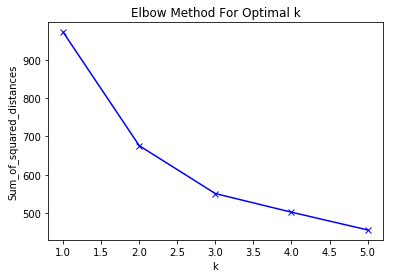

In [586]:
#find the optimal value of k
import matplotlib.pyplot as plt
Sum_of_squared_distances = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(rome_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [587]:
# set number of clusters
kclusters = 4

rome_grouped_clustering = rome_grouped.drop('Neighborhood', 1)
#rome_grouped_clustering

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rome_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:120] 

array([0, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 3, 1, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [588]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

rome_merged = df_merged
rome_merged.dropna() 
rome_merged.head()

,Nr,Comune,Pop,Area,Densitykm2,Alt,Lat,Long
0,2.,Guidonia Montecelio,89.671,"79,47",1.128,105,41.9998179,12.7262970
1,3.,Fiumicino,80.470,"213,89",376,1,41.7715258,12.2300032
2,4.,Pomezia,63.792,"86,57",737,108,41.6692930,12.5017934
3,5.,Tivoli,56.472,"68,65",823,235,41.9635786,12.7982722
4,6.,Anzio,55.101,"43,65",1.262,3,41.4479468,12.6290520


In [590]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
rome_merged = df_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Comune')
#rome_merged["Cluster Labels Int"] = pd.Series([], dtype=object)
#rome_merged['Cluster Labels Int'] = rome_merged['Cluster Labels']
rome_merged = rome_merged.dropna()
rome_merged.loc["Cluster Labels"] = np.int64(0)
rome_merged # check the last columns!
rome_merged["Cluster Labels"] = rome_merged['Cluster Labels'].astype(int)
rome_merged.head()

,Nr,Comune,Pop,Area,Densitykm2,Alt,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2.,Guidonia Montecelio,89.671,"79,47",1.128,105,41.9998179,12.7262970,0,Supermarket,Bar,Playground,Pub,Food,Flower Shop,Fireworks Store,Financial or Legal Service,Fast Food Restaurant,Winery
1,3.,Fiumicino,80.470,"213,89",376,1,41.7715258,12.2300032,2,Seafood Restaurant,Italian Restaurant,Restaurant,Café,Hotel,Bed & Breakfast,Pub,Japanese Restaurant,Mediterranean Restaurant,Harbor / Marina
2,4.,Pomezia,63.792,"86,57",737,108,41.6692930,12.5017934,3,Café,Winery,Pizza Place,Outdoors & Recreation,Music Venue,Italian Restaurant,Food,Food Court,Electronics Store,Event Service
3,5.,Tivoli,56.472,"68,65",823,235,41.9635786,12.7982722,1,Italian Restaurant,Restaurant,Plaza,Historic Site,Park,Café,Scenic Lookout,Pub,Sandwich Place,Pizza Place
4,6.,Anzio,55.101,"43,65",1.262,3,41.4479468,12.6290520,2,Seafood Restaurant,Café,Italian Restaurant,Ice Cream Shop,Lighthouse,Pizza Place,Multiplex,Plaza,Movie Theater,Food


In [591]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(rome_merged['Lat'], rome_merged['Long'], rome_merged['Comune'], rome_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [592]:
rome_merged.loc[rome_merged['Cluster Labels'] == 0, rome_merged.columns[[0] + list(range(5, rome_merged.shape[1]))]]

,Nr,Alt,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2.,105,41.9998179,12.7262970,0,Supermarket,Bar,Playground,Pub,Food,Flower Shop,Fireworks Store,Financial or Legal Service,Fast Food Restaurant,Winery
5,7.,372,41.6913360,12.7779750,0,Plaza,Supermarket,Donut Shop,Pizza Place,Electronics Store,IT Services,Ice Cream Shop,Chinese Restaurant,Fast Food Restaurant,Flower Shop
8,10.,37,41.6118040,12.5154620,0,Pizza Place,Bar,Restaurant,Event Space,Bed & Breakfast,Fireworks Store,Food & Drink Shop,Food,Flower Shop,Winery
9,11.,360,41.7698036,12.6585277,0,Plaza,Restaurant,Train Station,Ice Cream Shop,Fast Food Restaurant,Food,Flower Shop,Fireworks Store,Financial or Legal Service,Winery
10,12.,2,41.9550297,12.0698000,0,Restaurant,Seafood Restaurant,Shopping Mall,Plaza,Supermarket,Beach,Financial or Legal Service,Food,Flower Shop,Fireworks Store
11,13.,165,42.0517834,12.6170401,0,Bar,Dessert Shop,Ice Cream Shop,Plaza,Italian Restaurant,Fast Food Restaurant,Food,Flower Shop,Fireworks Store,Financial or Legal Service
12,14.,400,41.7284842,12.6608404,0,Café,Trattoria/Osteria,Winery,Food Stand,Donut Shop,Electronics Store,Event Service,Event Space,Fast Food Restaurant,Financial or Legal Service
13,15.,124,41.8025436,12.6021362,0,Dessert Shop,Hotel,Ice Cream Shop,Bakery,Supermarket,Japanese Restaurant,Financial or Legal Service,Food & Drink Shop,Food,Flower Shop
14,16.,81,41.9937777,12.0934629,0,Pizza Place,Arts & Crafts Store,Bus Station,Food Stand,Donut Shop,Electronics Store,Event Service,Event Space,Fast Food Restaurant,Financial or Legal Service
15,17.,130,41.9946479,12.6189436,0,Home Service,Italian Restaurant,Construction & Landscaping,Seafood Restaurant,Harbor / Marina,Food Court,Donut Shop,Electronics Store,Health Food Store,Event Service


In [593]:
rome_merged.loc[rome_merged['Cluster Labels'] == 1, rome_merged.columns[[0] + list(range(5, rome_merged.shape[1]))]]

,Nr,Alt,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,5.,235,41.9635786,12.7982722,1,Italian Restaurant,Restaurant,Plaza,Historic Site,Park,Café,Scenic Lookout,Pub,Sandwich Place,Pizza Place
18,20.,320,41.8062042,12.6804299,1,Italian Restaurant,Restaurant,Café,Pub,Hotel,Plaza,Outdoors & Recreation,Ice Cream Shop,Multiplex,Park
25,27.,412,41.7217010,12.6740631,1,Italian Restaurant,Diner,Restaurant,Museum,Plaza,Roman Restaurant,Steakhouse,Winery,Flower Shop,Fireworks Store


In [594]:
rome_merged.loc[rome_merged['Cluster Labels'] == 2, rome_merged.columns[[0] + list(range(5, rome_merged.shape[1]))]]

,Nr,Alt,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,3.,1,41.7715258,12.2300032,2,Seafood Restaurant,Italian Restaurant,Restaurant,Café,Hotel,Bed & Breakfast,Pub,Japanese Restaurant,Mediterranean Restaurant,Harbor / Marina
4,6.,3,41.4479468,12.6290520,2,Seafood Restaurant,Café,Italian Restaurant,Ice Cream Shop,Lighthouse,Pizza Place,Multiplex,Plaza,Movie Theater,Food


In [595]:
rome_merged.loc[rome_merged['Cluster Labels'] == 3, rome_merged.columns[[0] + list(range(5, rome_merged.shape[1]))]]

,Nr,Alt,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,4.,108,41.6692930,12.5017934,3,Café,Winery,Pizza Place,Outdoors & Recreation,Music Venue,Italian Restaurant,Food,Food Court,Electronics Store,Event Service
6,8.,10,42.0911797,11.7968144,3,Café,Italian Restaurant,Pizza Place,Ice Cream Shop,Hotel,Beach,Historic Site,Clothing Store,Food Court,Bar
7,9.,11,41.4575846,12.6610751,3,Italian Restaurant,Plaza,Café,Food Court,Harbor / Marina,Historic Site,Pizza Place,Seafood Restaurant,Fountain,Financial or Legal Service
16,18.,435,41.7074552,12.6900991,3,Italian Restaurant,Café,Gluten-free Restaurant,Winery,Food Stand,Donut Shop,Electronics Store,Event Service,Event Space,Fast Food Restaurant
21,23.,320,41.7886267,12.6677014,3,Italian Restaurant,Pizza Place,Café,Food Stand,Bakery,Pub,Dessert Shop,Ice Cream Shop,Market,Supermarket
22,24.,195,42.0926441,12.2698934,3,Italian Restaurant,Seafood Restaurant,Pizza Place,Food,Café,Beach,Financial or Legal Service,Flower Shop,Fireworks Store,Winery
23,25.,280,42.1035970,12.1755678,3,Italian Restaurant,Café,Trattoria/Osteria,Train Station,Pub,Tailor Shop,Castle,Winery,Flower Shop,Fireworks Store
24,26.,7,42.0343445,11.8544556,3,Dessert Shop,Beach,Italian Restaurant,Pizza Place,Basketball Stadium,Electronics Store,Event Service,Event Space,Fast Food Restaurant,Food Stand
35,37.,225,42.0788150,12.4002120,3,Italian Restaurant,Restaurant,Café,Plaza,Bed & Breakfast,Financial or Legal Service,Food,Flower Shop,Fireworks Store,Winery
40,42.,160,42.1426666,12.5417222,3,Pizza Place,Italian Restaurant,Food Stand,Diner,Donut Shop,Electronics Store,Event Service,Event Space,Fast Food Restaurant,Financial or Legal Service


In [596]:
# get the town with highest population.

dfresult = df_merged.loc[0:4]
dfresult

,Nr,Comune,Pop,Area,Densitykm2,Alt,Lat,Long
0,2.,Guidonia Montecelio,89.671,"79,47",1.128,105,41.9998179,12.7262970
1,3.,Fiumicino,80.470,"213,89",376,1,41.7715258,12.2300032
2,4.,Pomezia,63.792,"86,57",737,108,41.6692930,12.5017934
3,5.,Tivoli,56.472,"68,65",823,235,41.9635786,12.7982722
4,6.,Anzio,55.101,"43,65",1.262,3,41.4479468,12.6290520


In [597]:
summary = pd.merge(dfresult, rome_merged, how='left', on=['Comune'])
sumx = summary.drop(['Area_x','Pop_x','Densitykm2_x','Densitykm2_y','Alt_x','Alt_y','Lat_x','Lat_y','Long_x','Pop_y','Area_y'], axis=1)
sumx

,Nr_x,Comune,Nr_y,Long_y,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2.,Guidonia Montecelio,2.,12.7262970,0,Supermarket,Bar,Playground,Pub,Food,Flower Shop,Fireworks Store,Financial or Legal Service,Fast Food Restaurant,Winery
1,3.,Fiumicino,3.,12.2300032,2,Seafood Restaurant,Italian Restaurant,Restaurant,Café,Hotel,Bed & Breakfast,Pub,Japanese Restaurant,Mediterranean Restaurant,Harbor / Marina
2,4.,Pomezia,4.,12.5017934,3,Café,Winery,Pizza Place,Outdoors & Recreation,Music Venue,Italian Restaurant,Food,Food Court,Electronics Store,Event Service
3,5.,Tivoli,5.,12.7982722,1,Italian Restaurant,Restaurant,Plaza,Historic Site,Park,Café,Scenic Lookout,Pub,Sandwich Place,Pizza Place
4,6.,Anzio,6.,12.6290520,2,Seafood Restaurant,Café,Italian Restaurant,Ice Cream Shop,Lighthouse,Pizza Place,Multiplex,Plaza,Movie Theater,Food


In [598]:
summary1 =  summary[["Comune", "9th Most Common Venue","10th Most Common Venue"]]
summary1

,Comune,9th Most Common Venue,10th Most Common Venue
0,Guidonia Montecelio,Fast Food Restaurant,Winery
1,Fiumicino,Mediterranean Restaurant,Harbor / Marina
2,Pomezia,Electronics Store,Event Service
3,Tivoli,Sandwich Place,Pizza Place
4,Anzio,Movie Theater,Food
